In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


dengue_labels = pd.read_csv('../../data/dengue_labels_train.csv')
dengue_features = pd.read_csv('../../data/dengue_features_train.csv')

merged_df = pd.merge(dengue_labels, dengue_features, on=['city','year', 'weekofyear'], how='inner')
merged_df.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:
merged_df.info

<bound method DataFrame.info of      city  year  weekofyear  total_cases week_start_date   ndvi_ne   ndvi_nw  \
0      sj  1990          18            4      1990-04-30  0.122600  0.103725   
1      sj  1990          19            5      1990-05-07  0.169900  0.142175   
2      sj  1990          20            4      1990-05-14  0.032250  0.172967   
3      sj  1990          21            3      1990-05-21  0.128633  0.245067   
4      sj  1990          22            6      1990-05-28  0.196200  0.262200   
...   ...   ...         ...          ...             ...       ...       ...   
1451   iq  2010          21            5      2010-05-28  0.342750  0.318900   
1452   iq  2010          22            8      2010-06-04  0.160157  0.160371   
1453   iq  2010          23            1      2010-06-11  0.247057  0.146057   
1454   iq  2010          24            1      2010-06-18  0.333914  0.245771   
1455   iq  2010          25            4      2010-06-25  0.298186  0.232971   

       

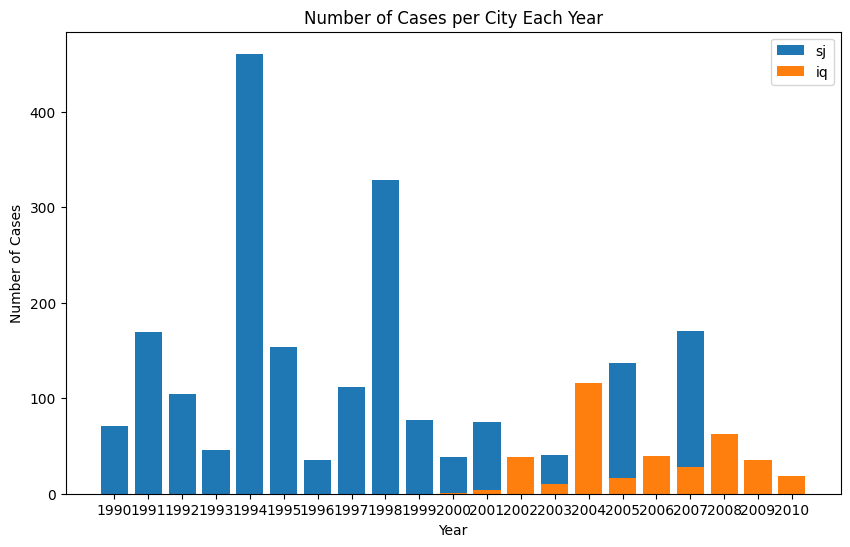

In [4]:
#Which city has the most cases per year

plt.figure(figsize=(10, 6))

# Loop through each city
for city in merged_df['city'].unique():
    city_data = merged_df[merged_df['city'] == city]
    plt.bar(city_data['year'], city_data['total_cases'], label=city)

plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Number of Cases per City Each Year')
plt.xticks(merged_df['year'].unique())  # Ensure all years are displayed
plt.legend()
plt.show()

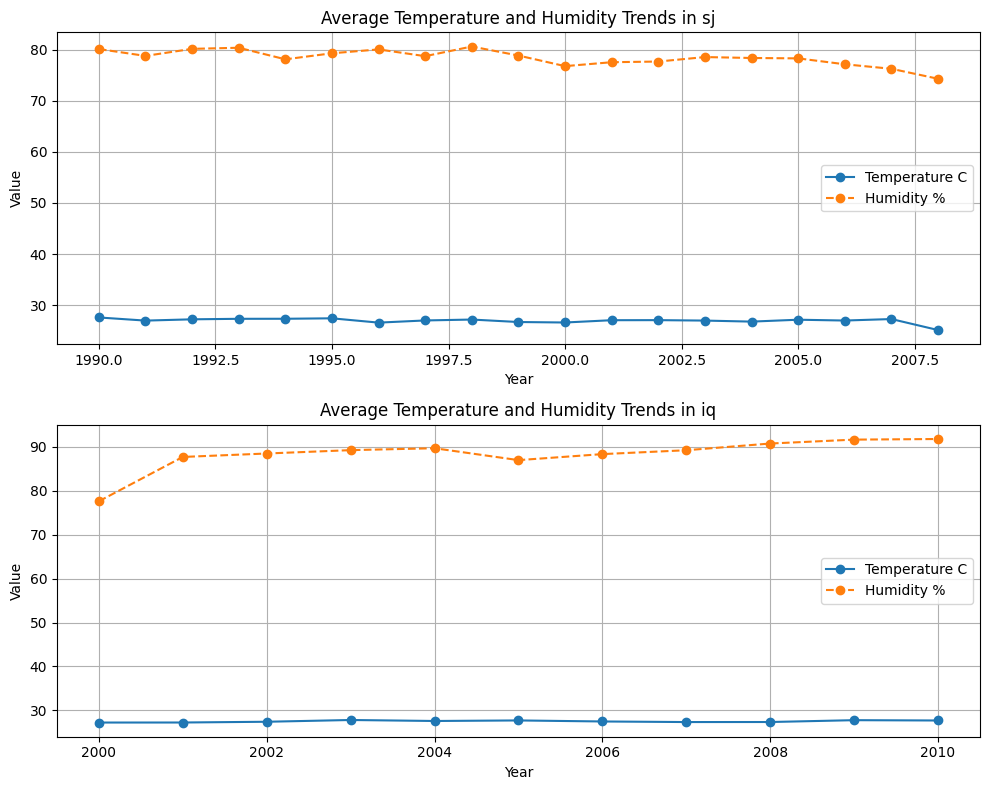

In [5]:
# Calculate average temperature and humidity for each year and city
average_data = merged_df.groupby(['city', 'year']).agg({'station_avg_temp_c': 'mean', 'reanalysis_relative_humidity_percent': 'mean'}).reset_index()

# Create a figure with two subplots (one for each city)
fig, axs = plt.subplots(2, figsize=(10, 8))

# Loop through each city
for i, city in enumerate(merged_df['city'].unique()):
    city_data = average_data[average_data['city'] == city]
    
    # Plot average temperature
    axs[i].plot(city_data['year'], city_data['station_avg_temp_c'], marker='o', label='Temperature C')
    
    # Plot average humidity
    axs[i].plot(city_data['year'], city_data['reanalysis_relative_humidity_percent'], marker='o', linestyle='--', label='Humidity %')
    
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Value')
    axs[i].set_title(f'Average Temperature and Humidity Trends in {city}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

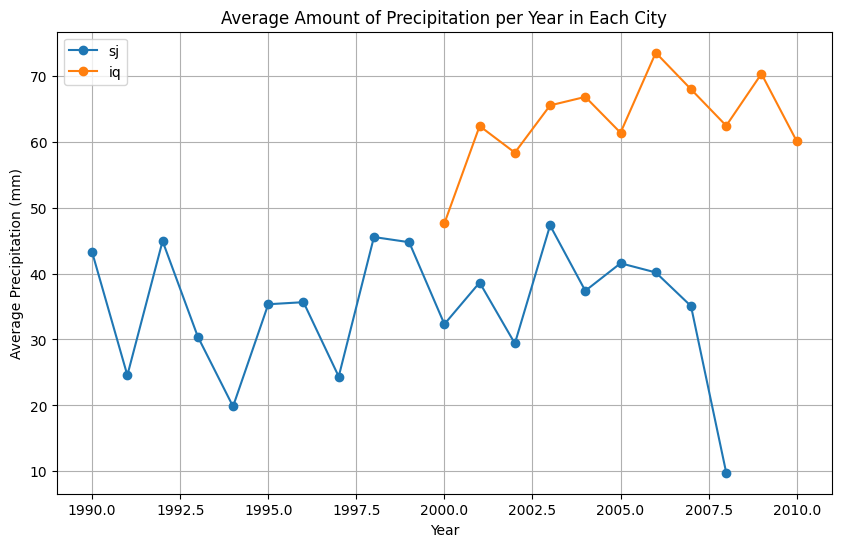

In [6]:
# Calculate average precipitation per year for each city
average_precipitation = merged_df.groupby(['year', 'city'])['precipitation_amt_mm'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Loop through each city
for city in average_precipitation['city'].unique():
    city_data = average_precipitation[average_precipitation['city'] == city]
    plt.plot(city_data['year'], city_data['precipitation_amt_mm'], marker='o', label=city)

plt.xlabel('Year')
plt.ylabel('Average Precipitation (mm)')
plt.title('Average Amount of Precipitation per Year in Each City')
plt.legend()
plt.grid(True)
plt.show()

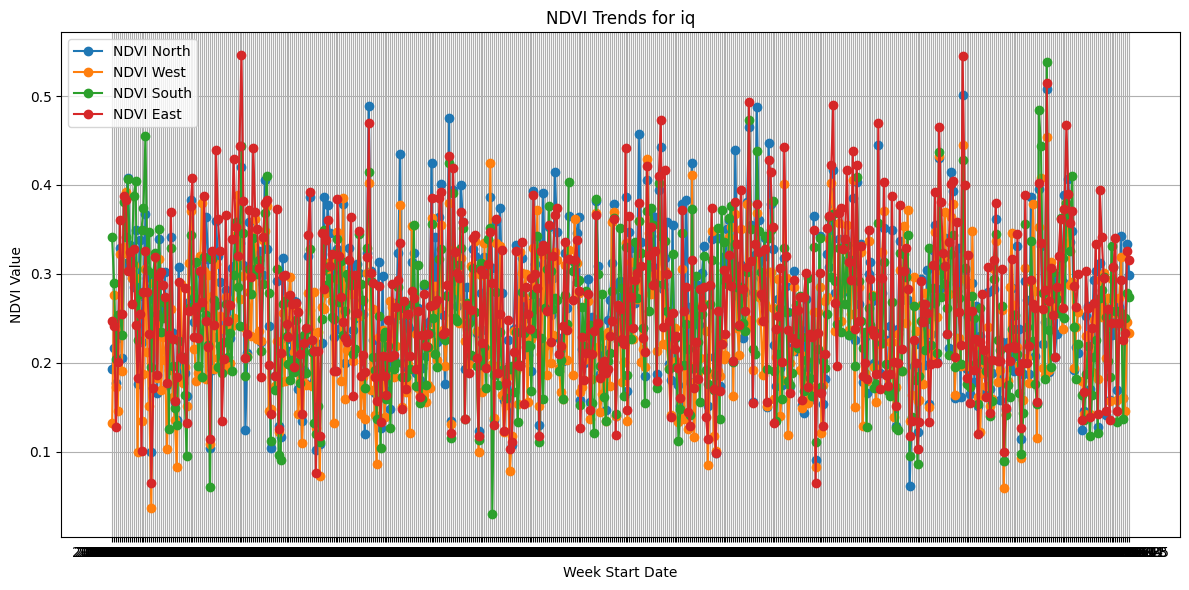

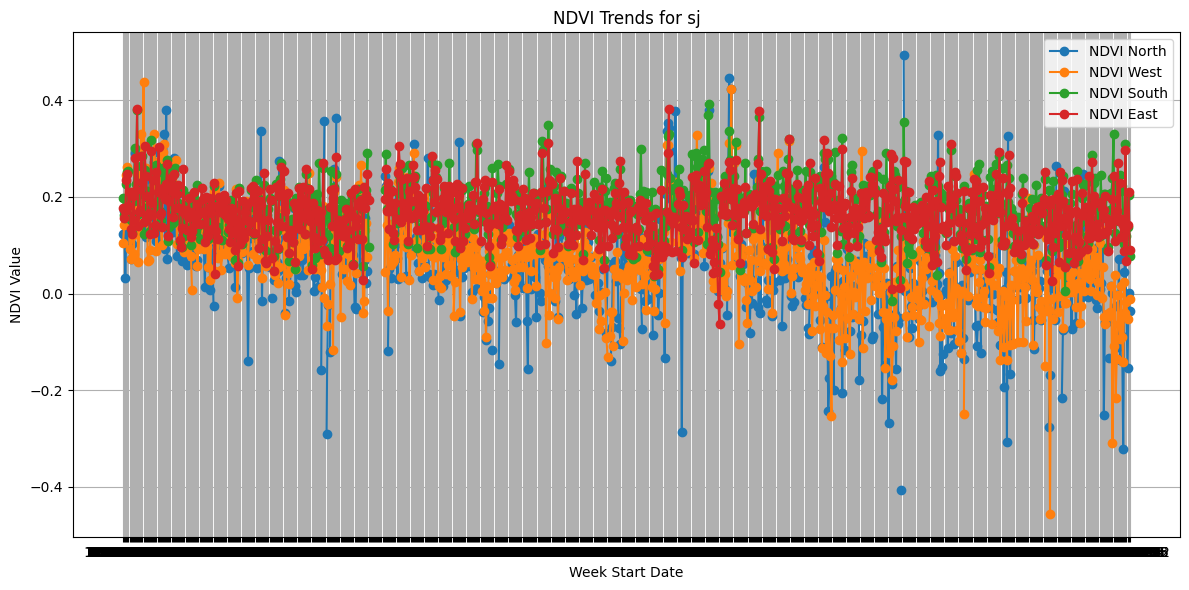

In [7]:
import matplotlib.pyplot as plt

# Group data by city
grouped_data = merged_df.groupby('city')

# Plot line charts for each city
for city, city_data in grouped_data:
    plt.figure(figsize=(12, 6))
    
    # Plot NDVI for each city
    plt.plot(city_data['week_start_date'], city_data['ndvi_ne'], label='NDVI North', marker='o')
    plt.plot(city_data['week_start_date'], city_data['ndvi_nw'], label='NDVI West', marker='o')
    plt.plot(city_data['week_start_date'], city_data['ndvi_se'], label='NDVI South', marker='o')
    plt.plot(city_data['week_start_date'], city_data['ndvi_sw'], label='NDVI East', marker='o')
    
    plt.xlabel('Week Start Date')
    plt.ylabel('NDVI Value')
    plt.title(f'NDVI Trends for {city}')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


In [8]:
cols_with_nan_values = dengue_features.columns[dengue_features.isna().sum() > 0].tolist()

In [9]:
for col in cols_with_nan_values:
    print(col)
    dengue_features[col] = dengue_features[col].fillna(dengue_features[col].mean())

ndvi_ne
ndvi_nw
ndvi_se
ndvi_sw
precipitation_amt_mm
reanalysis_air_temp_k
reanalysis_avg_temp_k
reanalysis_dew_point_temp_k
reanalysis_max_air_temp_k
reanalysis_min_air_temp_k
reanalysis_precip_amt_kg_per_m2
reanalysis_relative_humidity_percent
reanalysis_sat_precip_amt_mm
reanalysis_specific_humidity_g_per_kg
reanalysis_tdtr_k
station_avg_temp_c
station_diur_temp_rng_c
station_max_temp_c
station_min_temp_c
station_precip_mm


In [10]:
# check if preprocessing worked
rows_with_missing_values = merged_df[merged_df.isna().any(axis=1)]
rows_with_missing_values

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
5,sj,1990,23,2,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
9,sj,1990,27,6,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1
13,sj,1990,31,17,1990-07-30,NaN,0.247150,0.379700,0.381357,32.66,...,34.60,80.584286,32.66,17.594286,2.585714,28.242857,8.085714,34.4,22.8,37.6
14,sj,1990,32,23,1990-08-06,NaN,0.064333,0.164443,0.138857,28.80,...,20.00,79.650000,28.80,17.950000,2.328571,28.200000,7.557143,33.3,23.3,11.4
15,sj,1990,33,13,1990-08-13,NaN,0.128033,0.206957,0.168243,90.75,...,101.90,84.178571,90.75,18.515714,1.857143,28.042857,6.685714,32.8,22.8,44.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,iq,2009,23,3,2009-06-04,0.114000,0.092443,0.097471,0.126286,42.22,...,53.91,95.507143,42.22,16.757143,6.071429,28.100000,11.800000,34.0,22.2,NaN
1409,iq,2009,32,5,2009-08-06,0.395000,0.352733,0.484286,0.401914,9.79,...,34.40,87.811429,9.79,16.337143,11.757143,27.975000,12.100000,35.4,20.5,NaN
1430,iq,2010,53,0,2010-01-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431,iq,2010,1,10,2010-01-08,0.124571,0.179129,0.163843,0.135471,27.04,...,8.50,78.271429,27.04,16.127143,11.100000,28.600000,12.300000,35.1,21.8,NaN


In [11]:
#Normalising
from sklearn.preprocessing import MinMaxScaler, StandardScaler

columns_to_normalize = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_relative_humidity_percent', 'station_avg_temp_c']

# Min-Max scaling
scaler_minmax = MinMaxScaler()
merged_df[columns_to_normalize] = scaler_minmax.fit_transform(merged_df[columns_to_normalize])

# Z-score normalization
scaler_standard = StandardScaler()
merged_df[columns_to_normalize] = scaler_standard.fit_transform(merged_df[columns_to_normalize])

print(merged_df.head())

  city  year  weekofyear  total_cases week_start_date   ndvi_ne   ndvi_nw  \
0   sj  1990          18            4      1990-04-30 -0.140192 -0.223645   
1   sj  1990          19            5      1990-05-07  0.196522  0.096889   
2   sj  1990          20            4      1990-05-14 -0.783365  0.353580   
3   sj  1990          21            3      1990-05-21 -0.097243  0.954632   
4   sj  1990          22            6      1990-05-28  0.383743  1.097461   

    ndvi_se   ndvi_sw  precipitation_amt_mm  ...  \
0 -0.071781 -0.294358             -0.762931  ...   
1 -0.561071 -0.558220             -0.524947  ...   
2 -0.630918 -0.375120             -0.256757  ...   
3  0.321991  0.400368             -0.695655  ...   
4  0.642209  0.536934             -0.875058  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             -1.229999   
1                            17.94                             -0.670270

In [12]:
from sklearn.preprocessing import OrdinalEncoder

categorical_feature = ["city"]

cities = merged_df[categorical_feature]
encoder = OrdinalEncoder()
encoded_cities = encoder.fit_transform(cities)
dengue_labels[categorical_feature] = encoded_cities
dengue_features[categorical_feature] = encoded_cities
dengue_features

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1.0,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1.0,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1.0,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1.0,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1.0,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.0,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,0.0,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,0.0,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,0.0,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [13]:
merged_df = pd.merge(dengue_labels, dengue_features, on=['city','year', 'weekofyear'], how='inner')
merged_df.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1.0,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1.0,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1.0,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1.0,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1.0,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [14]:
from sklearn.model_selection import train_test_split 

X = merged_df[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'year', 'weekofyear', 
               'reanalysis_relative_humidity_percent', 'station_avg_temp_c', 'city']]
y = merged_df['total_cases']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define XGBoost model
model = XGBRegressor()

# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get feature importance
feature_importance = best_model.feature_importances_
feature_names = X.columns
for feature_name, importance in zip(feature_names, feature_importance):
    print(f"{feature_name}: {importance}")


Mean Squared Error: 991.4424386697337
ndvi_ne: 0.02312256395816803
ndvi_nw: 0.08435367047786713
ndvi_se: 0.015226983465254307
ndvi_sw: 0.08316163718700409
precipitation_amt_mm: 0.02371370419859886
year: 0.2296857088804245
weekofyear: 0.25395163893699646
reanalysis_relative_humidity_percent: 0.018821651116013527
station_avg_temp_c: 0.10262227058410645
city: 0.16534022986888885


In [16]:
# Loop through the predictions and true labels
for i in range(len(X_test)):
    true_label = y_test.iloc[i]
    predicted_label = y_pred[i]
    print(f"True y: {true_label} Predicted y: {predicted_label}")


True y: 43 Predicted y: 51.470909118652344
True y: 6 Predicted y: 5.02283239364624
True y: 38 Predicted y: 38.462867736816406
True y: 7 Predicted y: 3.8284385204315186
True y: 10 Predicted y: 2.440483808517456
True y: 22 Predicted y: 9.749593734741211
True y: 42 Predicted y: 50.778297424316406
True y: 9 Predicted y: 7.915822982788086
True y: 5 Predicted y: 4.130774021148682
True y: 8 Predicted y: 13.940552711486816
True y: 0 Predicted y: 1.8885395526885986
True y: 37 Predicted y: 16.368331909179688
True y: 26 Predicted y: 16.489850997924805
True y: 8 Predicted y: 6.780583381652832
True y: 22 Predicted y: 30.655458450317383
True y: 22 Predicted y: 1.8449026346206665
True y: 16 Predicted y: 4.022695064544678
True y: 5 Predicted y: 5.3947038650512695
True y: 8 Predicted y: 7.1976423263549805
True y: 60 Predicted y: 79.96363067626953
True y: 11 Predicted y: 4.294881820678711
True y: 59 Predicted y: 50.02372360229492
True y: 10 Predicted y: 3.4168155193328857
True y: 15 Predicted y: 8.80557

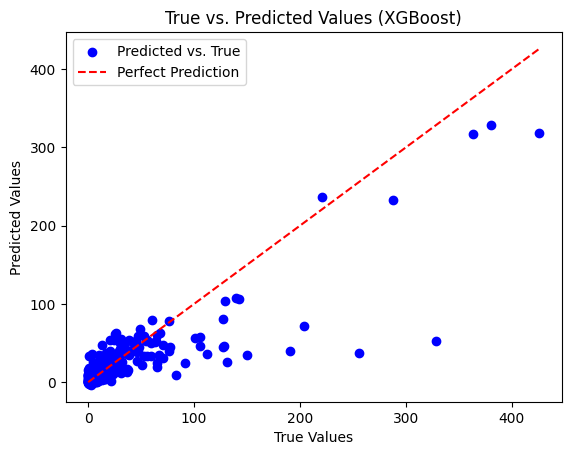

In [17]:
import matplotlib.pyplot as plt

# Make predictions on the testing set using the XGBoost model
y_pred_xgb = best_model.predict(X_test)

# Plot true versus predicted values
plt.scatter(y_test, y_pred_xgb, color='blue', label='Predicted vs. True')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values (XGBoost)')
plt.legend()
plt.show()


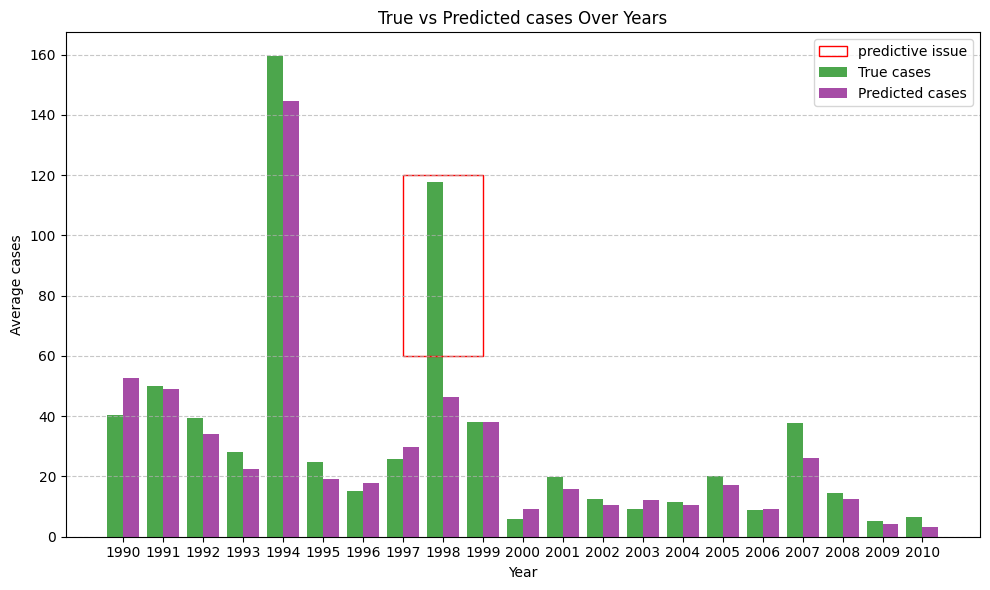

In [25]:
from matplotlib.patches import Rectangle
years = X_test['year'].unique()
true_labels = [y_test[X_test['year'] == year].mean() for year in years]
predicted_labels = [y_pred[X_test['year'] == year].mean() for year in years]
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(years - 0.2, true_labels, width=0.4, label='True cases', alpha=0.7, color= 'green')
ax.bar(years + 0.2, predicted_labels, width=0.4, label='Predicted cases', alpha=0.7, color= 'purple')

ax.set_xlabel('Year')
ax.set_ylabel('Average cases')
ax.set_title('True vs Predicted cases Over Years')



rect = Rectangle((1997, 60), 2,60 , edgecolor='red', facecolor='none', label='predictive issue')
plt.gca().add_patch(rect)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(years)
ax.set_xticklabels(years.astype(int))
plt.tight_layout()

plt.show()


In [19]:
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor

# Define the number of folds for cross-validation
k_folds = 5 

# Define the cross-validation strategy
cv = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean MSE:", cv_scores.mean())
print("Standard Deviation of MSE:", cv_scores.std())

Cross-Validation Scores: [1148.25604425  297.5229481   394.94947076  345.45251414  263.63809858]
Mean MSE: 489.963815166692
Standard Deviation of MSE: 332.11947186230196


In [20]:
from sklearn.metrics import r2_score

y_pred_new = np.round(y_pred).astype(int)
accuracy = r2_score(y_test.values, y_pred_new)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6911565880130266
